In [30]:
import polars as pl
import plotnine as p9

In [31]:
BENCHMARK_DATA = pl.read_parquet("benchmark_data.parquet").with_columns(
    pl.col("Time").log1p().alias("Log(Time)")
)

# replace_non_ascii

replace_non_ascii replaces non-ascii characters with a specified value. It contains a fast path when the specified value is the empty string "". In this case, it dispatches to a Rust plugin, remove_non_ascii. This benchmarks the fast path versus the generalized regex and a pure Python version.

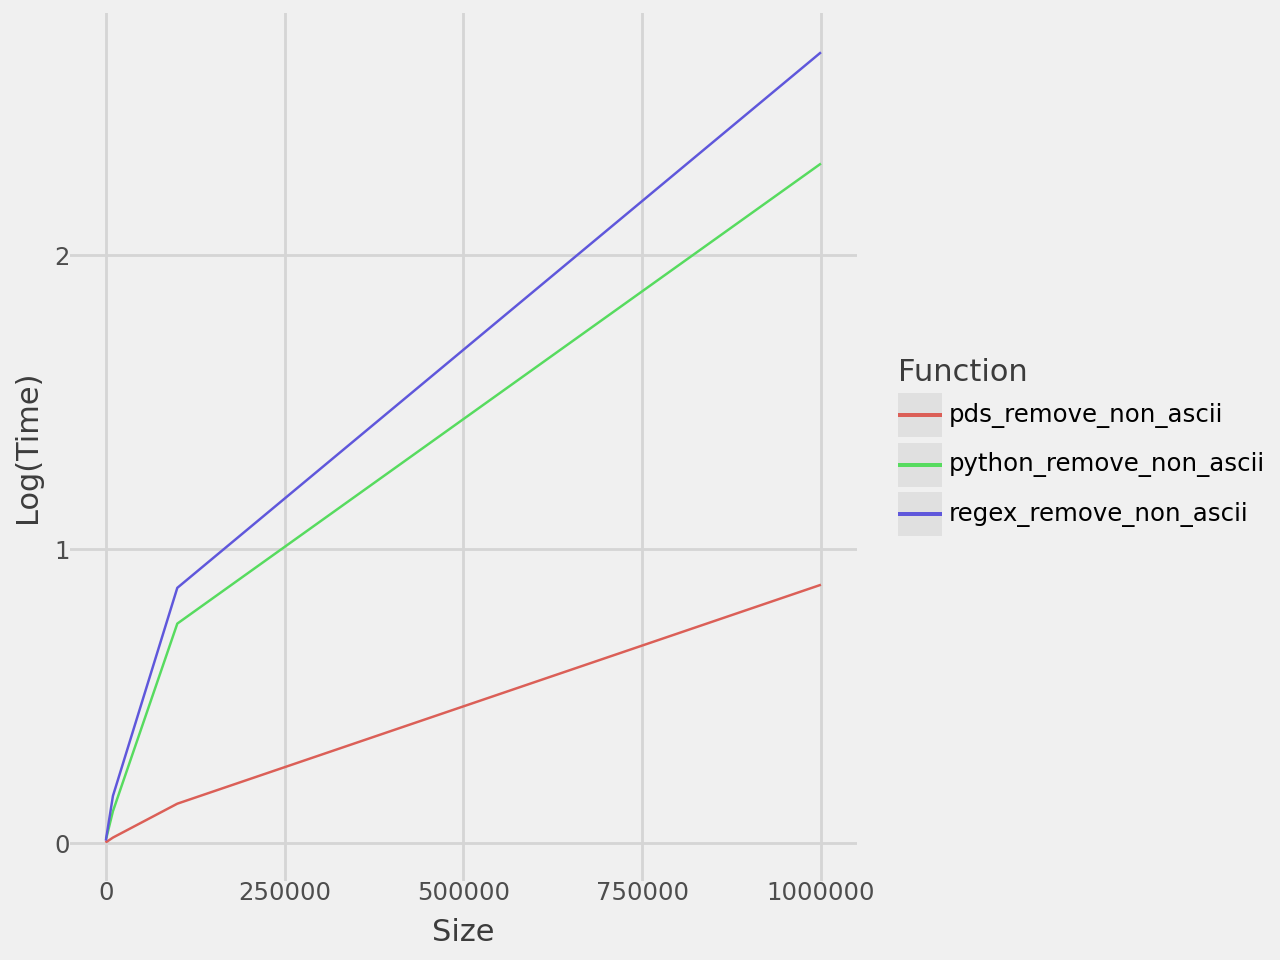

In [32]:
(
    p9.ggplot(
        BENCHMARK_DATA.filter(pl.col("Function").str.ends_with("_remove_non_ascii")),
        p9.aes(x="Size", y="Log(Time)", color="Function"),
    )
    + p9.geom_line()
    + p9.theme_538()
)

# remove_diacritics

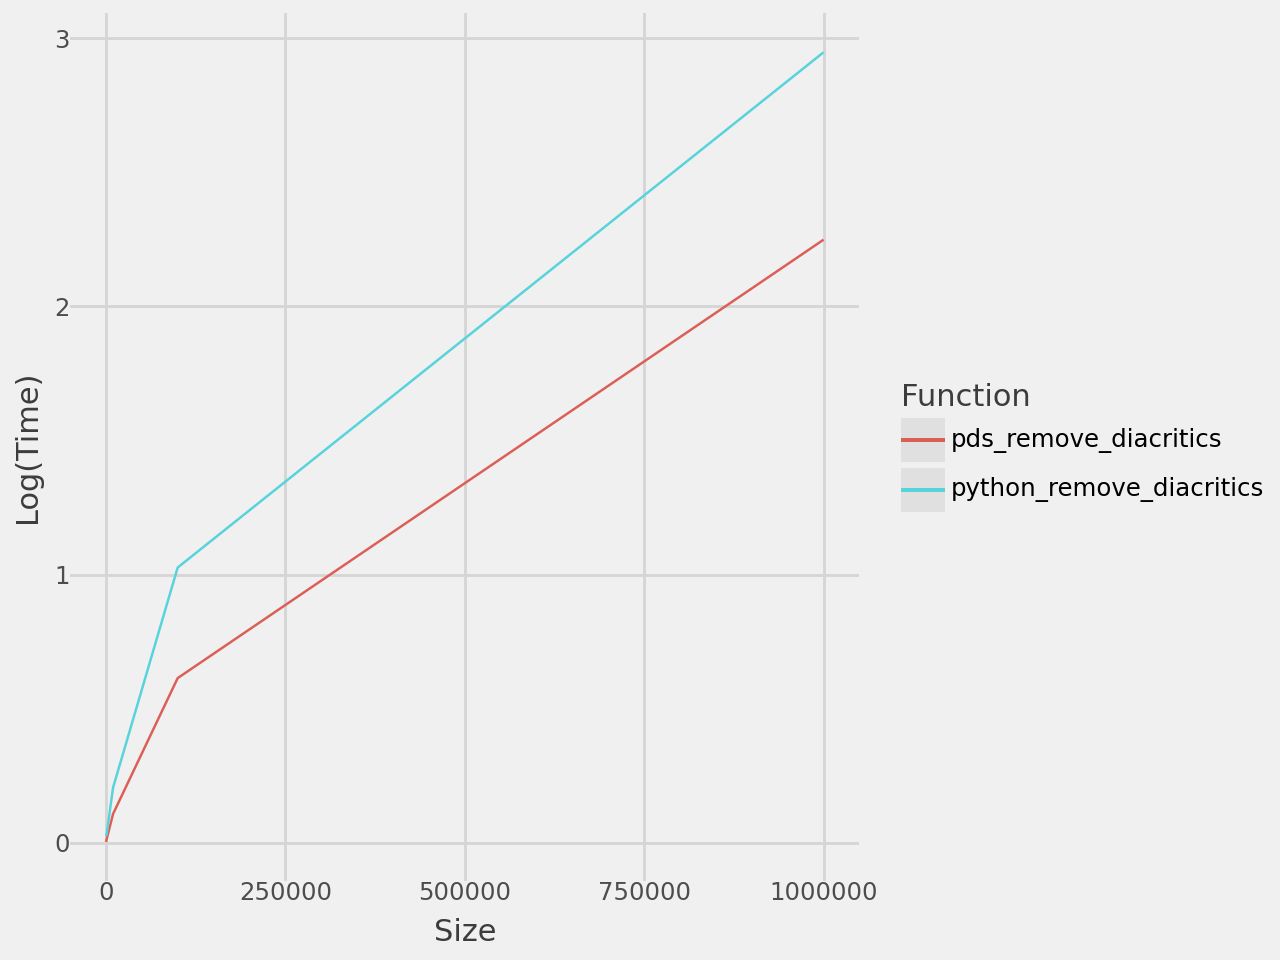

In [33]:
(
    p9.ggplot(
        BENCHMARK_DATA.filter(pl.col("Function").str.ends_with("_remove_diacritics")),
        p9.aes(x="Size", y="Log(Time)", color="Function"),
    )
    + p9.geom_line()
    + p9.theme_538()
)

# normalize_string

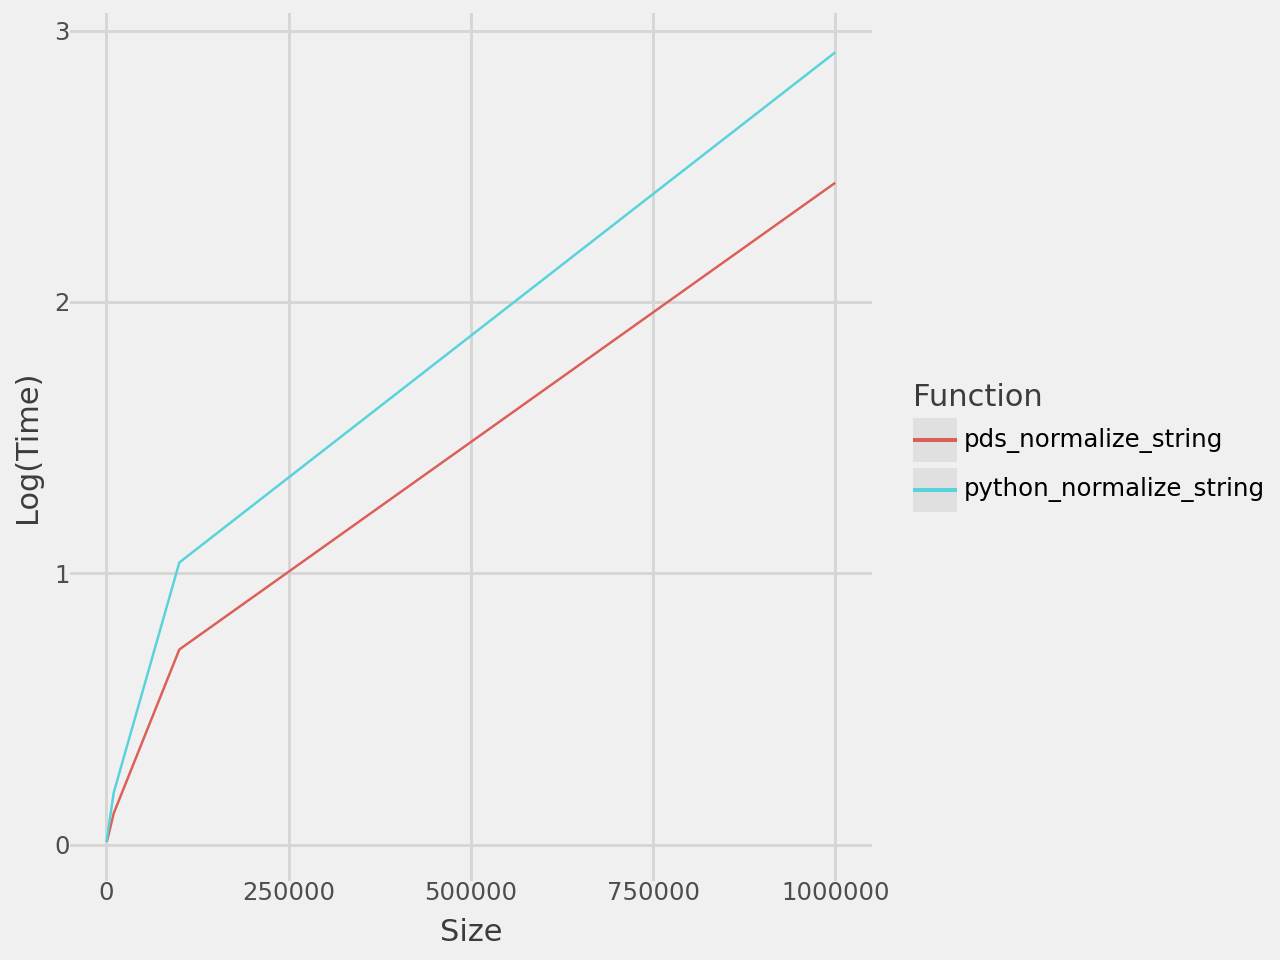

In [34]:
(
    p9.ggplot(
        BENCHMARK_DATA.filter(pl.col("Function").str.ends_with("_normalize_string")),
        p9.aes(x="Size", y="Log(Time)", color="Function"),
    )
    + p9.geom_line()
    + p9.theme_538()
)

# map_words

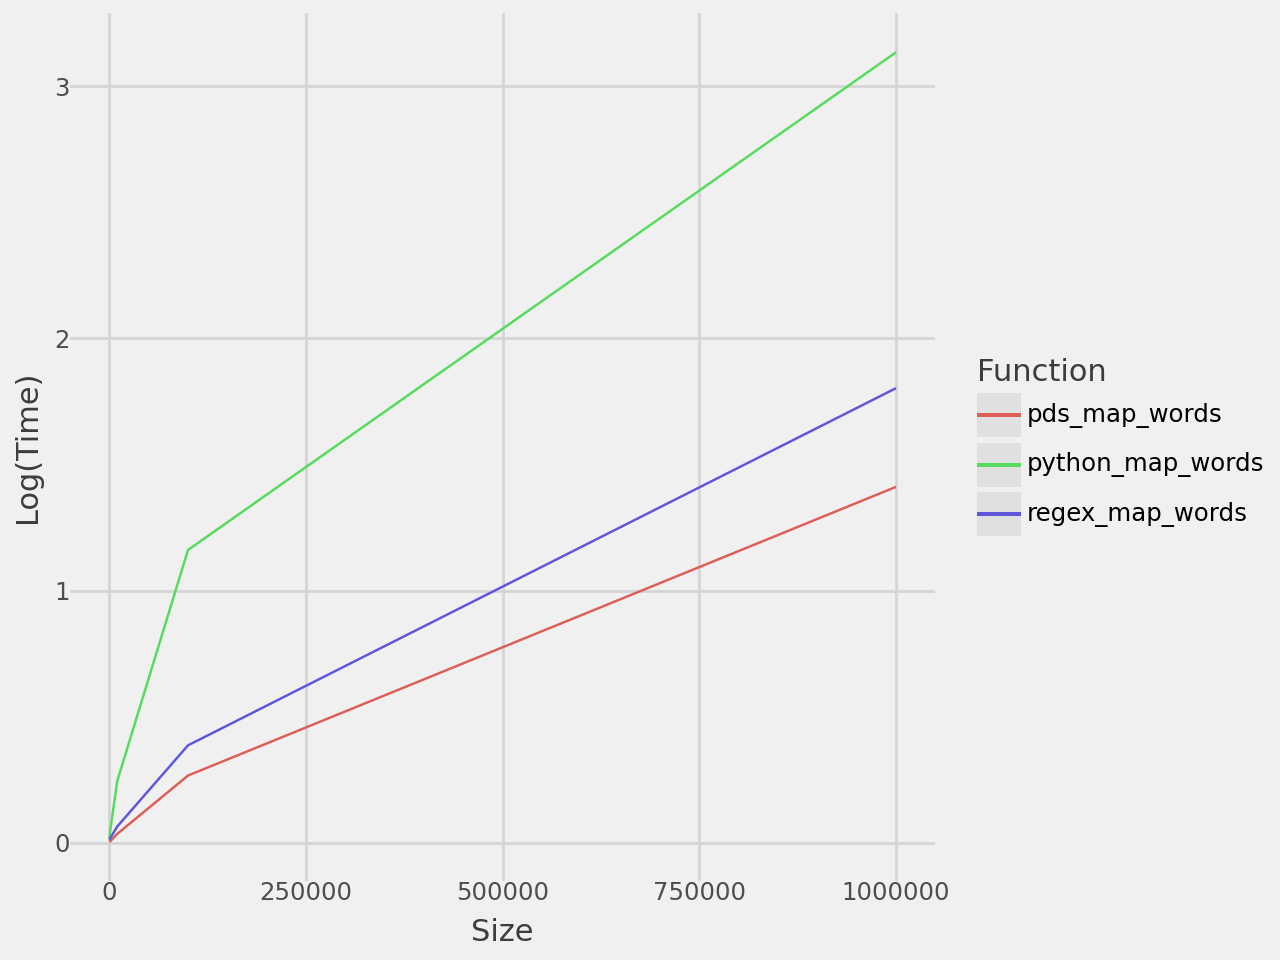

In [35]:
(
    p9.ggplot(
        BENCHMARK_DATA.filter(pl.col("Function").str.ends_with("_map_words")),
        p9.aes(x="Size", y="Log(Time)", color="Function"),
    )
    + p9.geom_line()
    + p9.theme_538()
)

# normalize_whitespace

Note that the fastest version (pds_normalize_whitespace) uses a regex. A plugin version was actually slower than the regex with similar performance to the expr version (.str.split().list.join()).

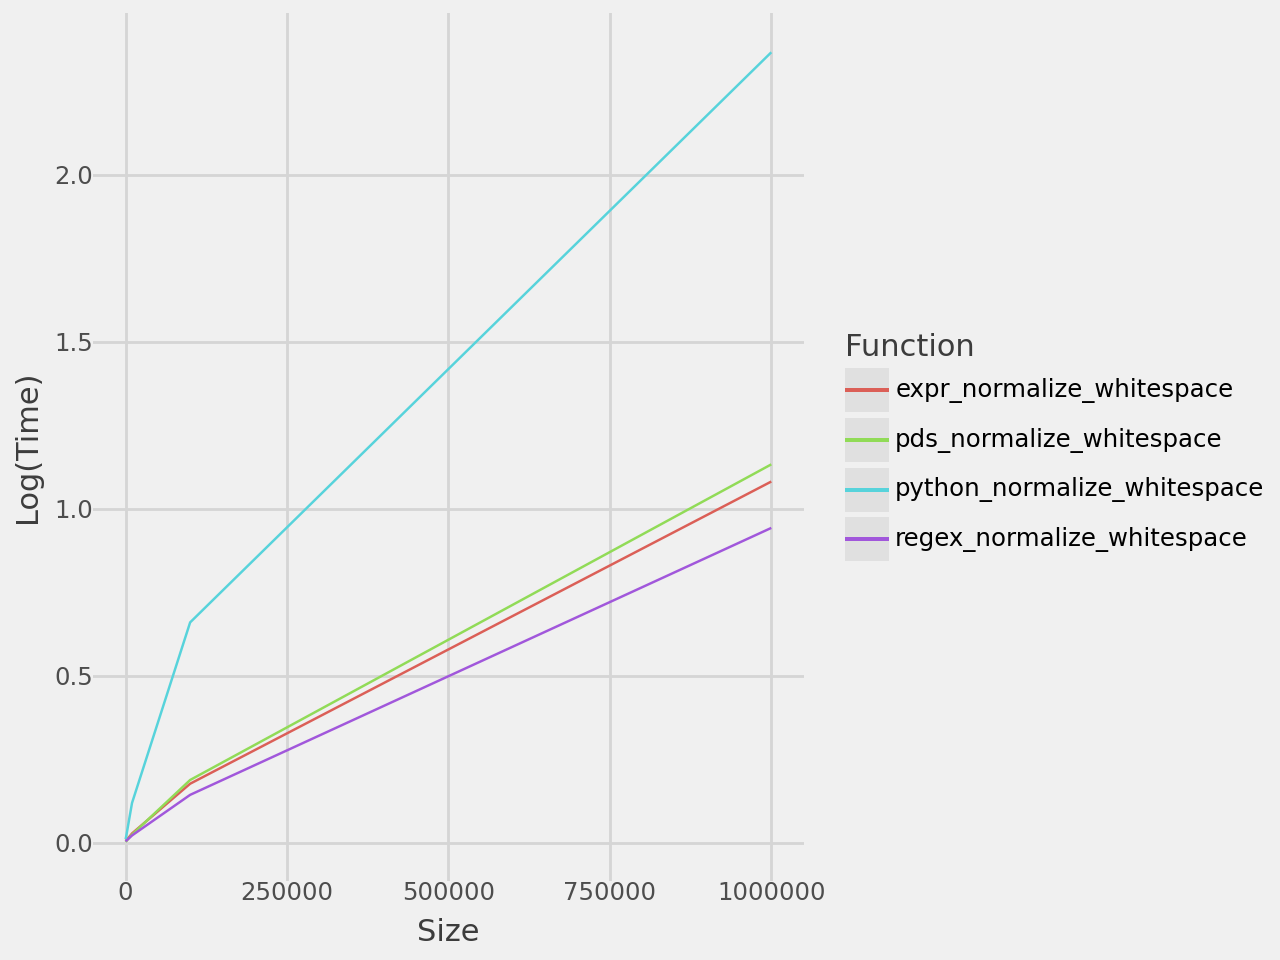

In [36]:
(
    p9.ggplot(
        BENCHMARK_DATA.filter(pl.col("Function").str.contains("_normalize_whitespace")),
        p9.aes(x="Size", y="Log(Time)", color="Function"),
    )
    + p9.geom_line()
    + p9.theme_538()
)

In [37]:
BENCHMARK_DATA

Function,Size,Time,Log(Time)
str,i64,f64,f64
"""python_remove_non_ascii""",100,0.015775,0.015651
"""regex_remove_non_ascii""",100,0.008471,0.008436
"""pds_remove_non_ascii""",100,0.008803,0.008764
"""python_remove_diacritics""",100,0.02522,0.024907
"""pds_remove_diacritics""",100,0.003181,0.003176
…,…,…,…
"""pds_map_words""",1000000,3.101781,1.411421
"""python_normalize_whitespace""",1000000,9.660021,2.3665
"""regex_normalize_whitespace""",1000000,1.566617,0.942589
